# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday April 20th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

**$\bar{x}$ and $\mu$ are not the same value. $\bar{x}$ is the sample mean we generate from the samples. However, what we want to use for our hypothesis is $\mu$ since it represents the population(true) mean.**

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

**The null hypothesis needs to be either  $H_0: \mu = 30$  since that is what we will use to test if the hypothesis is true or not. Our competing hypothesis should be what Stevey stated:  $H_1: \mu < 30$. **

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

**Stevie needs to compute a p value using his z statistic. The Z value tells us how many standard deviations away from the mean we are, and so we need to calculate a p value in order to determine if we can reject the null hypothesis or not. **

In [24]:
print("Z value for .05 = {}".format(stats.norm.ppf(.05)))
print("Z value for .05 = {}".format(stats.norm.ppf(.95)))
#stats.norm.ppf(.95)

Z value for .05 = -1.6448536269514729
Z value for .05 = 1.6448536269514722


**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

** The p value is not the probability that the null is true. The p value tells us that the probability of getting sample data as extreme or more extreme than our sample given that the null is true. In our case, this means that we only have a 3% chance of getting the samples values that Stevie used if the null were true. We can indeed reject the null hypothesis but we cannot state that there is a 3% chance that the null is true. **

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

#### Misuse:
##### -p values tell the probability of your hypothesis given your data
##### -that p-values can tell you the probability that a result occurred by chance
##### -that a p-value can tell you if your hypothesis is correct
##### -a p-value tell you the size of an effect, the strength of the evidence or the importance of a result

#### Suggestions:
##### -there should be a move to rely more on other measures, such as confidence intervals or Bayesian analyses
##### -others suggested that we simply need a better understanding and greater acceptance of variation to solve this problem

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. 

In [28]:
np.random.seed(1235)
dfP = pd.read_csv("data/pizza.csv")

In [33]:
dfP.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,01-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,01-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,2
2,Thursday,01-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,01-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,01-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

#use all data points(1000+) and do a z test, normal distribution is fine here

$H_0: 30$ minutes

$H_1: < 30$ minutes



In [167]:
mu = 30 #null hyp
xbar = dfP['time'].mean()
n = dfP['time'].count()
sigma = dfP['time'].std()
z = (xbar - mu)/(sigma/np.sqrt(n))
print(z)
print("Our test Statistic(z): {}".format(z))
print("our p value: {} is less than alpha(.05), so we can reject the null hypothesis".format(stats.norm.cdf(z)))


-3.17120774749
Our test Statistic(z): -3.171207747489349
our p value: 0.0007590326718121277 is less than alpha(.05), so we can reject the null hypothesis


**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

In [166]:
mu = 65 #null hyp
xbar = dfP['temperature'].mean()
n = dfP['temperature'].count()
sigma = dfP['temperature'].std()
z = (xbar - mu)/(sigma/np.sqrt(n))
print(z)
print("Our test Statistic(z): {}".format(z))
print("our p value: {} is not greater than alpha(.95), so we cannot reject the null hypothesis".format(stats.norm.cdf(z)))

1.3820886485
Our test Statistic(z): 1.3820886485016115
our p value: 0.9165277582565314 is not greater than alpha(.95), so we cannot reject the null hypothesis


**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

$$z = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{ \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

In [199]:
dfMario = dfP.loc[dfP['driver'] == 'Mario']
dfLuigi = dfP.loc[dfP['driver'] == 'Luigi']

mario = dfMario['temperature'].mean()
mariostd = dfMario['temperature'].std()
mariocount = dfMario['temperature'].count()
luigi = dfLuigi['temperature'].mean()
luigistd = dfLuigi['temperature'].std()
luigicount = dfLuigi['temperature'].count()


z_temp = (mario - luigi)/(np.sqrt(mariostd**2/mariocount + luigistd**2/luigicount))  
#print(z_temp)




mario = dfMario['time'].mean()
mariostd = dfMario['time'].std()
mariocount = dfMario['time'].count()
luigi = dfLuigi['time'].mean()
luigistd = dfLuigi['time'].std()
luigicount = dfLuigi['time'].count()


z_time = (mario - luigi)/(np.sqrt(mariostd**2/mariocount + luigistd**2/luigicount))  
#print(z_time)


print("z range for 95% is {} to {}".format(stats.norm.ppf(.05), stats.norm.ppf(.95)))

print("there is not statistical evidence for giving either of them a raise in either case since our test statistic z for temp: {} and time: {} are within this interval".format(z_temp, z_time))






z range for 95% is -1.6448536269514729 to 1.6448536269514722
there is not statistical evidence for giving either of them a raise in either case since our test statistic z for temp: -0.9565371563188988 and time: 0.004366184867476149 are within this interval



**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

### Office Hours notes: 

Salvatores proportions of late delivs = $\hat{p} $
Null hyp H0 p = 0.05
Comp hyp H1 P > .05
One tailed, proportions

$z$ (<- test stat) = $\frac{\hat{p} - p}{var(estimator)}$ (assuming that $H_0$ is true)

**recall:**
$\hat{p} = x/n$ where x is the number of successes(late pizzas) and n is the # of flips(total number of pizzas)

want: variance of phat

var(\hat{p}) = var(x/n) = 1/n^2 * var(x)

X~bin(n,p) => var(x) = np(1-p)

so then... var($\hat{p}) = \frac{p(1-p)}/{n}$

### all of this is in my phone pics 

### done


In [140]:
dfSalvatore = dfP.loc[dfP['driver'] == 'Salvatore']
late = dfSalvatore.loc[dfSalvatore['time'] > 40].count()['time']
total = dfSalvatore.count()['time']
alpha = .05
z = (late/total - alpha)/np.sqrt((alpha*(1-alpha))/ total)
print("test statistic z: {}".format(z))
print("critical point for rejection: ", stats.norm.ppf(1-.05))
print('{} < {} cannot reject'.format(z, stats.norm.ppf(1-.05)))


test statistic z: 0.445293626395764
critical point for rejection:  1.64485362695
0.445293626395764 < 1.6448536269514722 cannot reject


#### THis means fortunately Salvatore gets to keep his job :)

### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

t based CI for the mean:

$\bar{X} \pm t * (s/\sqrt{n})$ where s is the sample standard deviation

In [151]:
n = 12
std = 3.2
CI = .95
alpha = 1 - CI
t = stats.t.ppf(1-alpha/2, n-1) #n-1 degrees of freedom since we lose one dof in mean calculation
xbar = 15.5
#calculate the CI the same way as a z based CI:
NapCI = [xbar-(t)*std/np.sqrt(n), xbar+(t)*std/np.sqrt(n)]
print("95% CI for the mean of the nap group {}".format(NapCI))


95% CI for the mean of the nap group [13.46681700054998, 17.53318299945002]


**Part B**: Is there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

$H_0:$ Nap Memory = 12.25 ie. Nap memory = Coffee memory -> no difference between the two groups

$H_1:$ Nap memory > 12.25  ie Nap memory > Coffee memory() -> there is sifficient evidence at the .05 significance level that the nap group performed better

In [31]:
c_mu = 12.25
n_x = 15.5
n=12
std = 3.1

t = (n_x-c_mu)/(std/np.sqrt(n))
print("test statistic t: {}".format(t))
print("critical value: "stats.t.ppf(.95, n-1))

test statistic t: 3.631719435225065
1.7958848187036691


### Our 

**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.  

#not the same as solving for sigma in the CI, there is a new equation for this that is in the slides
#lecture 20 has the equation

CI for STD follows a chi-sq distribution

$$\sqrt{\frac{(n-1)*s^2}{X_{\alpha/2}^2, n-1}} < \sigma < \sqrt{\frac{(n-1)*s^2}{X_{1-\alpha/2}^2, n-1}}$$

In [209]:
n=12
std = 3.1
alpha = .05
xa2 = stats.chi2.ppf(alpha/2, n-1)
m1xa2 = stats.chi2.ppf(1-alpha/2, n-1)

CI = [np.sqrt(((n-1) * std**2)/(m1xa2)), np.sqrt(((n-1) * std**2)/(xa2))]
print("95% CI for std of memory recall for coffee drinkers: {}".format(CI))

95% CI for std of memory recall for coffee drinkers: [2.1960249676730244, 5.2634218549444185]


### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [459]:
dfAd = pd.read_csv("data/email.csv")

dfAd.sort_values(by=['Clicked', "Group"])


,Group,Date,Sent,Clicked
29,1,Oct 30 2017,50,0
31,2,Oct 1 2017,50,0
48,2,Oct 18 2017,50,0
59,2,Oct 29 2017,50,0
67,3,NaN,50,0
81,3,NaN,50,0
89,3,Oct 28 2017,50,0
0,1,NaN,50,1
4,1,Oct 5 2017,50,1
7,1,NaN,50,1


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

##### H_0 = .05 CTR : The current ads are as good as Johnny's ad
##### H_1 > .05 CTR : Johnnys ads are better, and there is evidence for this

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [416]:
ratio = dfAd['Clicked'] / dfAd['Sent']
CTR = .05
JCTR = ratio.mean()
print("ratio", JCTR)
std = ratio.std()

z = (JCTR - CTR)/(std/np.sqrt(dfAd['Clicked'].count()))
print(z)
#print(stats.norm.ppf(.95))

print("z test: {} < {} \nthus johnny has not shown that his results are significant enough to reject".format(z, stats.norm.ppf(.95)))

print("p test: {} < {} \nthus johnny has not shown that his results are significant enough to reject".format(stats.norm.cdf(z), .95))


ratio 0.05209677419354832
0.760778047923
z test: 0.7607780479228292 < 1.6448536269514722 
thus johnny has not shown that his results are significant enough to reject
p test: 0.7766051758555144 < 0.95 
thus johnny has not shown that his results are significant enough to reject


**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [468]:
dfAd = pd.read_csv("data/email.csv")
dfAd = dfAd[dfAd.Group == 3]
#print(dfAd)

ratio = dfAd['Clicked'] / dfAd['Sent']
CTR = .05
JCTR = ratio.mean()
print("ratio", JCTR)
std = ratio.std()

z = (JCTR - CTR)/(std/np.sqrt(dfAd['Clicked'].count()))
print(z)
#print(stats.norm.ppf(.95))

print("z test: {} < {} \nthus johnny has not shown that his results are significant enough to reject".format(z, stats.norm.ppf(.95)))

print("p test: {} < {} \nthus johnny has not shown that his results are significant enough to reject".format(stats.norm.cdf(z), .95))


ratio 0.05354838709677421
0.533703967261
z test: 0.5337039672612853 < 1.6448536269514722 
thus johnny has not shown that his results are significant enough to reject
p test: 0.7032268180311584 < 0.95 
thus johnny has not shown that his results are significant enough to reject


### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [10]:
dfAuto = pd.read_csv("data/auto.csv")
dfAuto.head(10)

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0
5,ford galaxie 500,70,15.0,8,198.0,4341.0
6,chevrolet impala,70,14.0,8,220.0,4354.0
7,plymouth fury iii,70,14.0,8,215.0,4312.0
8,pontiac catalina,70,14.0,8,225.0,4425.0
9,amc ambassador dpl,70,15.0,8,190.0,3850.0


**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [471]:
x = dfAuto['horsepower']
y = dfAuto['mpg']
bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
print('{} = {}{} + {}'.format('y', bhat, ' * x',ahat))

y = -0.15784473335365354 * x + 39.93586102117045


**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


Text(0,0.5,'MPG')

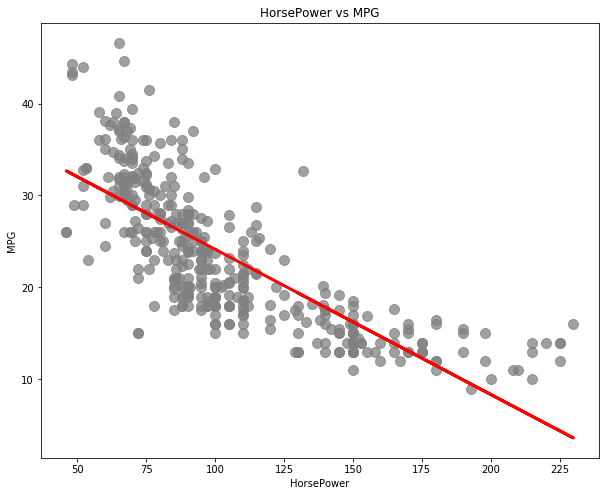

In [472]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax.scatter(x, y, color="grey", alpha=0.75, s=100)
ax.plot(x, ahat + bhat*x, color="red", lw=3);
plt.title('HorsePower vs MPG')
plt.xlabel("HorsePower")
plt.ylabel("MPG")


**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

**The relationship is negative. As our feature increases our response variable decreases. Our SLR model indicates that as horsepower increases, MPG decreases. **

In [473]:
ybar = y.mean()
#print(ybar)
#Calculate SSE and show the coefficient
SSE = np.array([(y[i] - (bhat * x[i] + ahat))**2 for i in range(len(y))]).sum()
print("SSE:", SSE)
SST = np.array([(y[i] - ybar)**2 for i in range(len(y))]).sum()
print("SST:", SST)
Rsq = 1 - SSE/SST
print("Rsquared = {}, so our model fits okay".format(Rsq))

SSE: 9385.91587193
SST: 23818.9934694
Rsquared = 0.6059482578894348, so our model fits okay


**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

$$\hat{\sigma}^2 = \frac{SSE}{n-2}$$

$$se(\hat{\beta}) = \frac{\hat{\sigma}}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}$$ 

$$CI = \hat{\beta} \pm t_{\alpha/2, n-2} * se(\hat{\beta})$$

In [479]:
n = len(x)
alpha = .05
xbar = x.mean()
sigma = np.sqrt(SSE/(n-2))
seB = sigma / np.sqrt(np.array([(x[i] - xbar)**2 for i in range(n)]).sum())

CI = (bhat + stats.t.ppf(alpha/2, n-2) * seB, bhat - stats.t.ppf(alpha/2, n-2) * seB)
print("CI95 for MPG vs Horsepower {}".format(CI))
#sweet!!!does not contain 0




CI95 for MPG vs Horsepower (-0.17051700846435688, -0.14517245824295019)


#### Since our 95% CI does not contain 0, we can say that there is a relation between MPG and Horsepower. 

**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

H_0: slope is 0 and there is no correlation
H_1: slope is non 0 and there is a correlation between our feature and result

**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [339]:
x = 97
y = -0.15784473335365354 * x + 39.93586102117045
print("Model Predicts {} MPG for a car with {} HP".format(y, x))

Model Predicts 24.62492188586606 MPG for a car with 97 HP
